# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Dataframe

In [2]:
# Define path
path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Python\03-2022 Instacart Basket Analysis'

In [3]:
# Import most recent Instacart dataframe as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe_v1.pkl'))

# 03. Data Security Precautions

In [5]:
pd.options.display.max_columns = None

In [6]:
# 'Name' is PII and should be removed
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
df = df.drop(columns = ['Name'])

# 04. Customer Behavior Insights

Customer Spending Behavior by Geographic Region

In [170]:
# Creating subset of df rendering each unique user to a single row, and preserving only key info
df_spenders = df[user_id]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,Region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [9]:
# Checking all State names are consistent
df['State'].value_counts()

Pennsylvania            667663
California              660340
Rhode Island            657526
Georgia                 656952
New Mexico              655094
Arizona                 654453
North Carolina          652219
Oklahoma                652197
Alaska                  648982
Minnesota               648337
Massachusetts           646937
Wyoming                 644863
Virginia                641962
Missouri                641167
Texas                   640942
Colorado                639713
Maine                   639071
North Dakota            638897
Alabama                 638510
Louisiana               638111
Kansas                  637901
Delaware                637359
South Carolina          637346
Oregon                  636873
Arkansas                636663
New York                636636
Nevada                  636592
Montana                 635754
South Dakota            634239
Illinois                633380
Hawaii                  633331
Washington              633315
Mississi

In [10]:
# Creating region object based on State
region = []
for state in df['State']:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        region.append('Northeast')
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        region.append('Midwest')
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        region.append('South')
    elif state in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        region.append('West')
    else:
        region.append('Unknown')

In [11]:
# Turning region object into Region column in main dataframe
df['Region'] = region

In [13]:
df['Region'].value_counts()

South        10800193
West          8299383
Midwest       7602756
Northeast     5727600
Name: Region, dtype: int64

In [92]:
df['Region'].value_counts().sum()

32429932

In [51]:
# List of normalized region counts
spenders_normalized_data = df['Region'].value_counts(normalize=True)

In [52]:
spenders_normalized_data

South        0.333032
West         0.255917
Midwest      0.234436
Northeast    0.176615
Name: Region, dtype: float64

In [54]:
# Appending normalized region counts onto itself in preparation for upcoming table
spenders_normalized_data = spenders_normalized_data.append(spenders_normalized_data)

In [66]:
# Taking steps to add a header to spenders normalized data
spenders_normalized_data = spenders_normalized_data.reset_index()

In [63]:
snd_header = ['Region', 'normalized_percent']

In [67]:
spenders_normalized_data

,index,Region
0,South,0.333032
1,West,0.255917
2,Midwest,0.234436
3,Northeast,0.176615
4,South,0.333032
5,West,0.255917
6,Midwest,0.234436
7,Northeast,0.176615


In [68]:
spenders_normalized_data.columns = snd_header

In [69]:
spenders_normalized_data

,Region,normalized_percent
0,South,0.333032
1,West,0.255917
2,Midwest,0.234436
3,Northeast,0.176615
4,South,0.333032
5,West,0.255917
6,Midwest,0.234436
7,Northeast,0.176615


In [30]:
# Table demonstrating High and Low spender counts by Region
spenders_by_region = df.groupby('spending_flag').agg({'Region' : ['value_counts']})

In [31]:
spenders_by_region

Region
                        value_counts
spending_flag Region                
High spender  South            40641
              West             31271
              Midwest          29299
              Northeast        18660
Low spender   South         10759552
              West           8268112
              Midwest        7573457
              Northeast      5708940

In [80]:
# Taking steps to arrange spenders_by_region into a table
spenders_by_region = spenders_by_region.reset_index()

In [81]:
spenders_by_region

spending_flag     Region             
                           value_counts
0  High spender      South        40641
1  High spender       West        31271
2  High spender    Midwest        29299
3  High spender  Northeast        18660
4   Low spender      South     10759552
5   Low spender       West      8268112
6   Low spender    Midwest      7573457
7   Low spender  Northeast      5708940

In [84]:
spenders_by_region.columns

MultiIndex([('spending_flag',             ''),
            (       'Region',             ''),
            (       'Region', 'value_counts')],
           )

In [85]:
# Adding real Region value counts to spenders normalized data
spenders_normalized_data['value_counts'] = spenders_by_region['Region', 'value_counts']

In [87]:
spenders_normalized_data['spending_flag'] = spenders_by_region['spending_flag']

In [88]:
spenders_normalized_data

,Region,normalized_percent,value_counts,spending_flag
0,South,0.333032,40641,High spender
1,West,0.255917,31271,High spender
2,Midwest,0.234436,29299,High spender
3,Northeast,0.176615,18660,High spender
4,South,0.333032,10759552,Low spender
5,West,0.255917,8268112,Low spender
6,Midwest,0.234436,7573457,Low spender
7,Northeast,0.176615,5708940,Low spender


In [93]:
# Creating a Normalized Count column
spenders_normalized_data['Normalized_Count'] = (spenders_normalized_data['value_counts'])*(spenders_normalized_data['normalized_percent'])

In [94]:
spenders_normalized_data

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count
0,South,0.333032,40641,High spender,1.353474e+04
1,West,0.255917,31271,High spender,8.002792e+03
2,Midwest,0.234436,29299,High spender,6.868752e+03
3,Northeast,0.176615,18660,High spender,3.295629e+03
4,South,0.333032,10759552,Low spender,3.583271e+06
5,West,0.255917,8268112,Low spender,2.115954e+06
6,Midwest,0.234436,7573457,Low spender,1.775494e+06
7,Northeast,0.176615,5708940,Low spender,1.008282e+06


Text(0.5, 1.0, 'High and Low Spenders per Region')

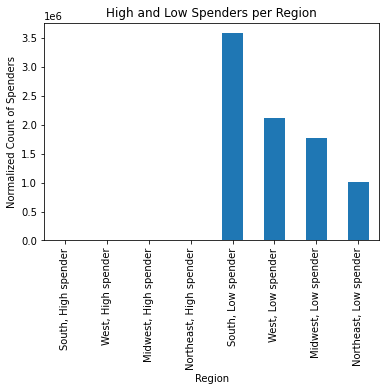

In [169]:
# Creating bar chart displaying high and low spenders per region side by side, and based on a normalized count
high_low_spenders_bar = spenders_normalized_data['Normalized_Count'].plot.bar()
high_low_spenders_bar.set_xticklabels(['South, High spender', 'West, High spender', 'Midwest, High spender', 'Northeast, High spender', 'South, Low spender', 'West, Low spender', 'Midwest, Low spender', 'Northeast, Low spender'])
high_low_spenders_bar.set_xlabel('Region')
high_low_spenders_bar.set_ylabel('Normalized Count of Spenders')
high_low_spenders_bar.set_title('High and Low Spenders per Region')

In [124]:
# Dividing spenders normalized data into low and high spender categories (low)
low_spenders_normalized = spenders_normalized_data[spenders_normalized_data['spending_flag'] == 'Low spender']

In [125]:
low_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count
4,South,0.333032,10759552,Low spender,3.583271e+06
5,West,0.255917,8268112,Low spender,2.115954e+06
6,Midwest,0.234436,7573457,Low spender,1.775494e+06
7,Northeast,0.176615,5708940,Low spender,1.008282e+06


In [126]:
# Dividing spenders normalized data into low and high spender categories (high)
high_spenders_normalized = spenders_normalized_data[spenders_normalized_data['spending_flag'] == 'High spender']

In [127]:
high_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count
0,South,0.333032,40641,High spender,13534.738331
1,West,0.255917,31271,High spender,8002.792167
2,Midwest,0.234436,29299,High spender,6868.751623
3,Northeast,0.176615,18660,High spender,3295.628742


In [137]:
# Creating total_high_spenders column
high_spenders_normalized['total_high_spenders'] = high_spenders_normalized['value_counts'].sum()

C:\Users\Lex\AppData\Local\Temp/ipykernel_14620/1227886473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_spenders_normalized['total_high_spenders'] = high_spenders_normalized['value_counts'].sum()


In [138]:
high_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count,total_high_spenders
0,South,0.333032,40641,High spender,13534.738331,119871
1,West,0.255917,31271,High spender,8002.792167,119871
2,Midwest,0.234436,29299,High spender,6868.751623,119871
3,Northeast,0.176615,18660,High spender,3295.628742,119871


In [141]:
# Creating percent_high_spenders column
high_spenders_normalized['percent_high_spenders'] = (high_spenders_normalized['value_counts'])/(high_spenders_normalized['total_high_spenders'])

C:\Users\Lex\AppData\Local\Temp/ipykernel_14620/3457494831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_spenders_normalized['percent_high_spenders'] = (high_spenders_normalized['value_counts'])/(high_spenders_normalized['total_high_spenders'])


In [142]:
high_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count,total_high_spenders,percent_high_spenders
0,South,0.333032,40641,High spender,13534.738331,119871,0.339039
1,West,0.255917,31271,High spender,8002.792167,119871,0.260872
2,Midwest,0.234436,29299,High spender,6868.751623,119871,0.244421
3,Northeast,0.176615,18660,High spender,3295.628742,119871,0.155667


In [143]:
# Creating total_low_spenders column
low_spenders_normalized['total_low_spenders'] = low_spenders_normalized['value_counts'].sum()

C:\Users\Lex\AppData\Local\Temp/ipykernel_14620/1931910400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_spenders_normalized['total_low_spenders'] = low_spenders_normalized['value_counts'].sum()


In [144]:
low_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count,total_low_spenders
4,South,0.333032,10759552,Low spender,3.583271e+06,32310061
5,West,0.255917,8268112,Low spender,2.115954e+06,32310061
6,Midwest,0.234436,7573457,Low spender,1.775494e+06,32310061
7,Northeast,0.176615,5708940,Low spender,1.008282e+06,32310061


In [145]:
# Creating percent_low_spenders column
low_spenders_normalized['percent_low_spenders'] = (low_spenders_normalized['value_counts'])/(low_spenders_normalized['total_low_spenders'])

C:\Users\Lex\AppData\Local\Temp/ipykernel_14620/1362395274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_spenders_normalized['percent_low_spenders'] = (low_spenders_normalized['value_counts'])/(low_spenders_normalized['total_low_spenders'])


In [146]:
low_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,Normalized_Count,total_low_spenders,percent_low_spenders
4,South,0.333032,10759552,Low spender,3.583271e+06,32310061,0.333009
5,West,0.255917,8268112,Low spender,2.115954e+06,32310061,0.255899
6,Midwest,0.234436,7573457,Low spender,1.775494e+06,32310061,0.234399
7,Northeast,0.176615,5708940,Low spender,1.008282e+06,32310061,0.176692


Text(0.5, 1.0, 'Proportion of High Spenders by Region')

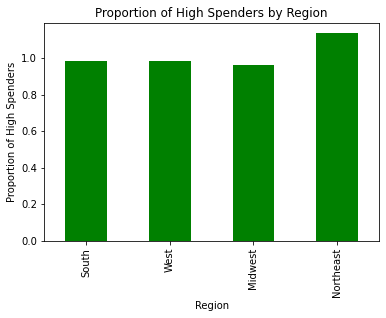

In [162]:
# Create Proportion of High Spenders by Region bar graph
high_spenders_bar = (high_spenders_normalized['normalized_percent']/high_spenders_normalized['percent_high_spenders']).plot.bar(color = 'green')
high_spenders_bar.set_xticklabels(high_spenders_normalized['Region'])
high_spenders_bar.set_xlabel('Region')
high_spenders_bar.set_ylabel('Proportion of High Spenders')
high_spenders_bar.set_title('Proportion of High Spenders by Region')

Text(0.5, 1.0, 'Proportion of Low Spenders by Region')

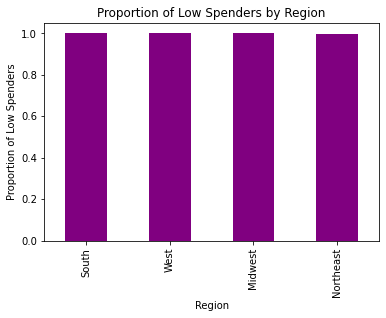

In [161]:
# Create Proportion of Low Spenders by Region bar graph
low_spenders_bar = (low_spenders_normalized['normalized_percent']/low_spenders_normalized['percent_low_spenders']).plot.bar(color = 'purple')
low_spenders_bar.set_xticklabels(low_spenders_normalized['Region'])
low_spenders_bar.set_xlabel('Region')
low_spenders_bar.set_ylabel('Proportion of Low Spenders')
low_spenders_bar.set_title('Proportion of Low Spenders by Region')